# Алгоритм для автоматической генерации расписания дополнительных занятий

In [1]:
from abc import ABC, abstractmethod, abstractproperty
import json

import numpy as np

## Трассировка и идея алгоритма

В качестве идеи алгоритма будем использовать идею жадного алгоритма. Т.к. сама по себе задача автоматического составления расписания является NP полной задачей, то применение жадного алгоритма позволит её привести к полиномиальной сложности.

Т.к. мы решили использовать жадный алгоритм, то нам необходима некоторая метрика, согласно которой на каждом шаге алгоритма будет делаться выбор. Нам также необходимо определить контекст этого выбора.

Для более понятного объяснения идеи алгоритм представим простой (придуманный) случай входных данных и проведем на них трассировку. В примере будем рассматривать составление расписания на 2 дня.

### Входные данные (придуманные, простые)

Предположим, что у нас 3 группы по основным образовательным программам (будем именовать их как "Г" с индексом, т.е. Г1, Г2, Г3).
В каждой группе есть студенты (их, для простоты будем именовать как "s" с двумя индексами: первый индекс -- номер группы, второй -- номер студента. Такое именования в будущем будет позволять нам проще оперировать данными)

Приведем таблицы того, сколько студентов в каждой группе
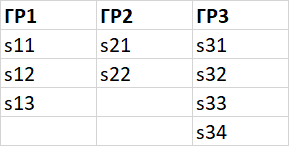



Далее обозначим дополнительные образовательные программы. Будем их обозначать как ДП с индексом. Их будет 3: ДП1, ДП2, ДП3.
Каждый из студентов может выбрать несколько программ. В рамках алгоритма необходимо разделить на группы студентов, выбравших определенные программы дополнительного образования и распределить их в свободные временные ячейки.

Предположим, что таблица по выбранным программам следующая

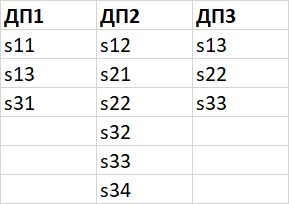


Далее, предположим, что согласно ОСНОВНОМУ РАСПИСАНИЮ у нас имеются занятия у следующих групп

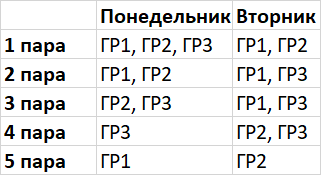


Это были входные данные, а теперь перейдем к трассировке

### Трассировка

1. Для начала составим инвертированную таблицу расписания. Т.е. тех групп, у которых окна

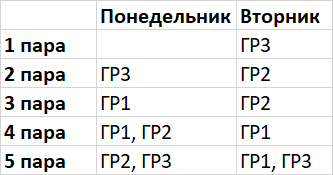


2. Составим таблицу со свободными студентами (используем регулярные выражения для упрощения)

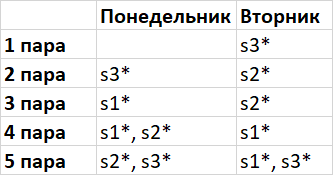

3. После этого по каждой дополнительной образовательной программы составим по таблице, где в каждой ячейке будет указано абсолютное количество записавшихся на нее студентов, которые свободны*.

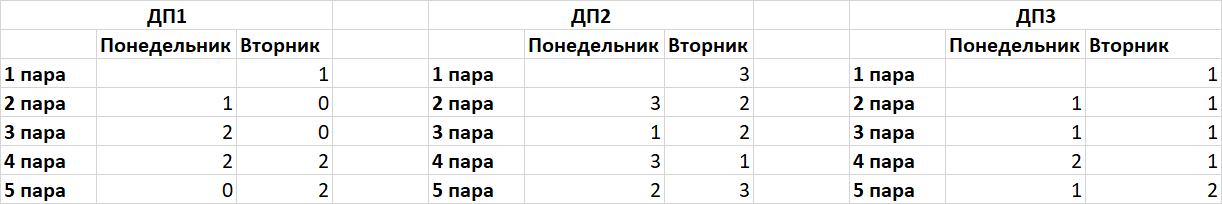


Как мы видим, все эти три таблицы ещё не связаны между собой, т.к. количество студентов задействованных для одной образовательной программы оценивается без учета того, что один и тот же студент может быть задействован в рамках одной и той же образовательной программы одновременно. Поэтому далее необходимо сделать выбор по каждой ячейке и уже скорректировать финальные таблицы. Именно здесь и вступает ЖАДНЫЙ алгоритм.

4. Начинается жадный алгоритм. Сравниваем все три таблицы по ячейкам. Начинаем с 2 пары понедельника (т.к. в первую пару все заняты). Для начала ранжируем ячейки за выбранный временной слот в соответствие с выбранной метриков. В данном случае рассматриваем в качестве метрики количество свободных студентов в временной слот. Берем ячейку с максимальным числом. Фиксируем его. Вносим изменения в таблицы по остальным программам, т.к. теперь, "зафиксированные студенты" уже заняты на этот период. Корректируем таблицу свободных студентов, которую мы делали в начале. Так делаем далее по списку отранжированных ячеек.
							
									
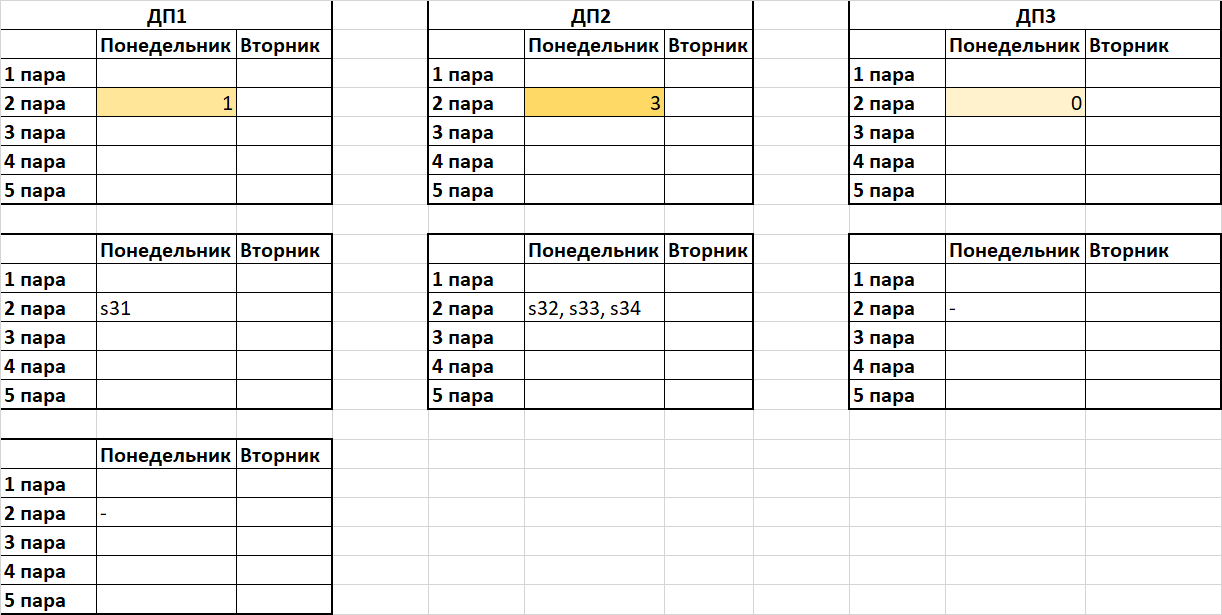

Сразу под таблицами с дополнительными образовательными программами построим таблицы занятых студентов для простоты. Ниже всего построим таблицу свободных студентов

Далее двигаемся в том же духе

								
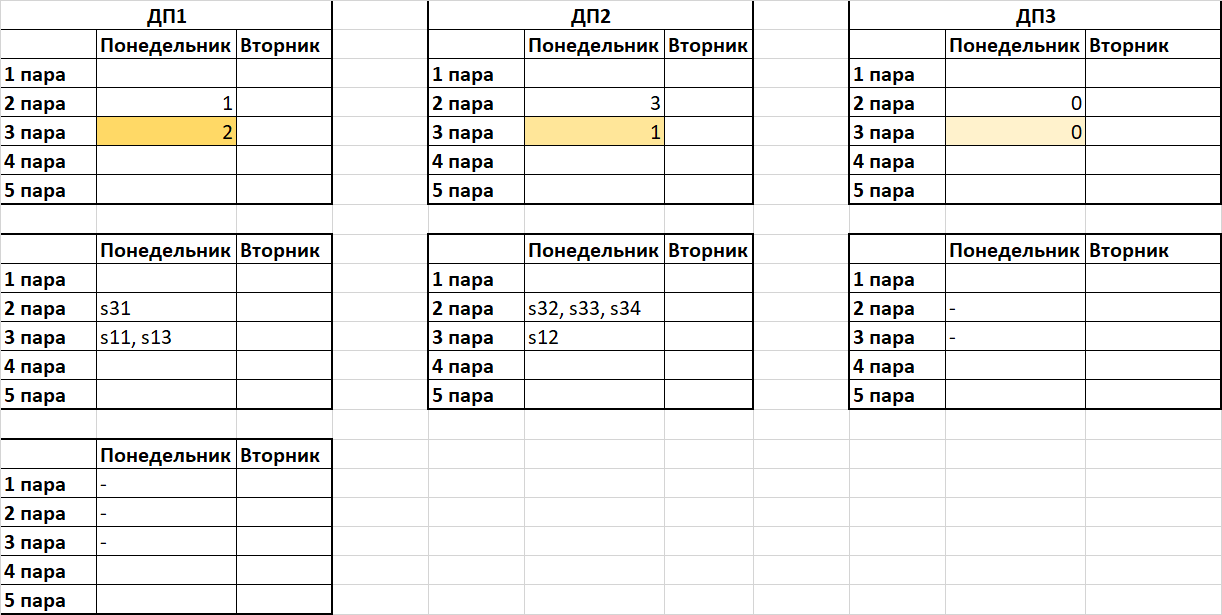

								
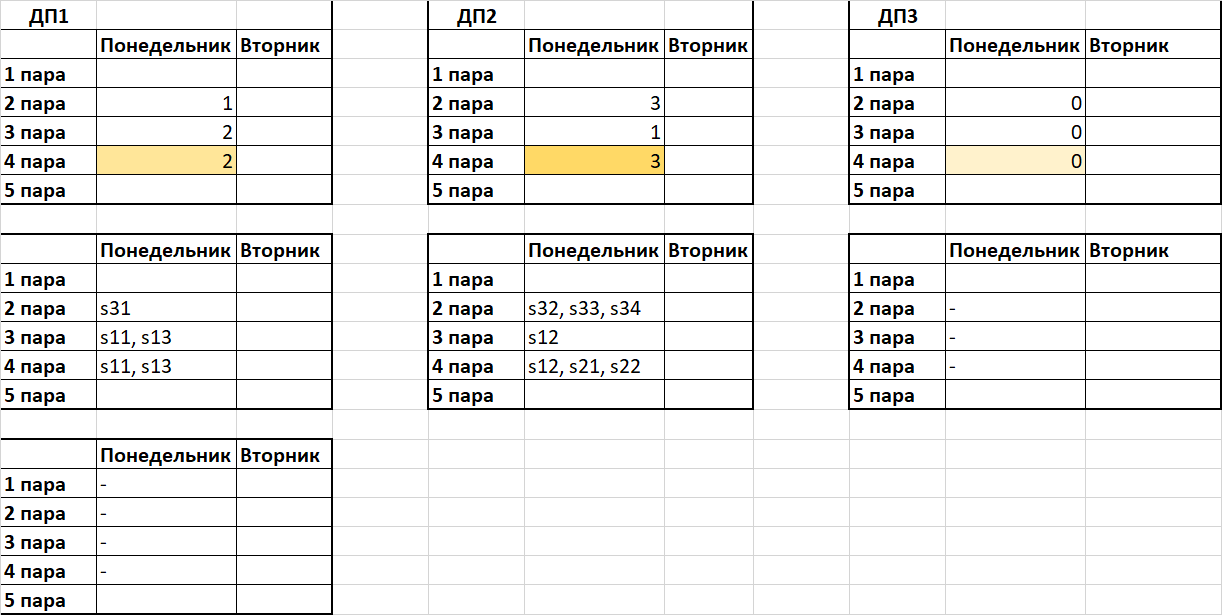

										
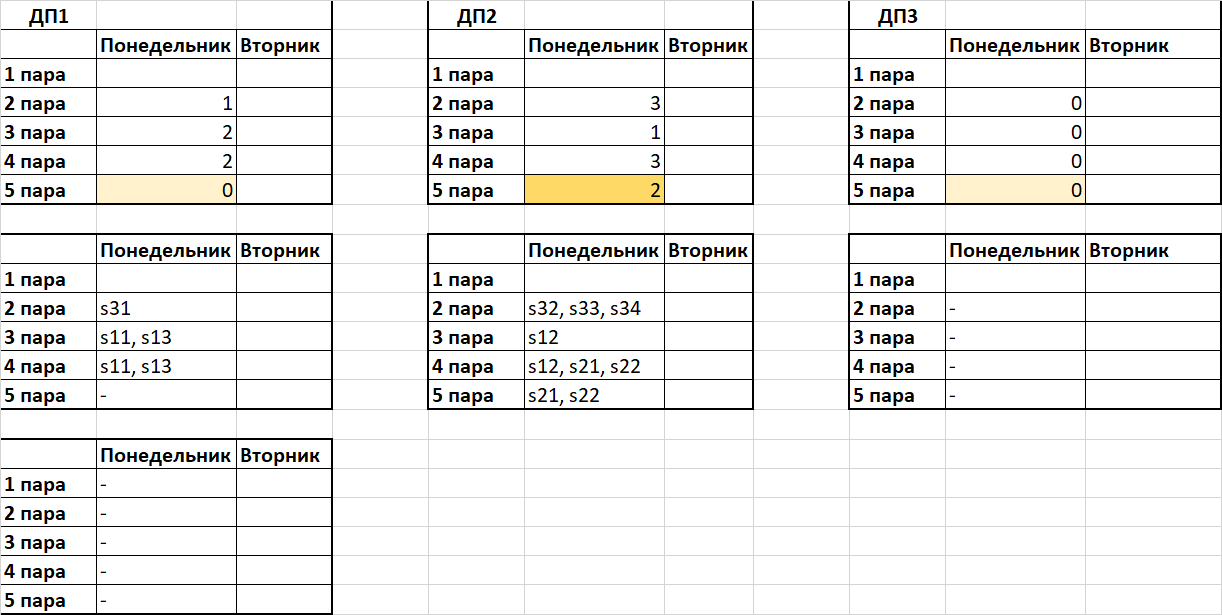



Предположим, что мы закончили эту часть алгоритма. Остановимся на понедельнике для простоты. Далее алгоритм масштабируется аналогичным образом.

5. Далее необходимо выделить группы. Это ещё один заменяемый модуль алгоритма. В данном случае сделаем его простым, будем брать из сформированных таблиц занятых по ДП студентов списки группировок по ячейкам и находить оттуда такие, которые будут максимальны по мощности и в совокупности будут покрывать максимальное количество студентов, записавшихся на ДП.

По итогу разбора (до шага 5) получили следующие таблицы по ДП (с 1 по 3)


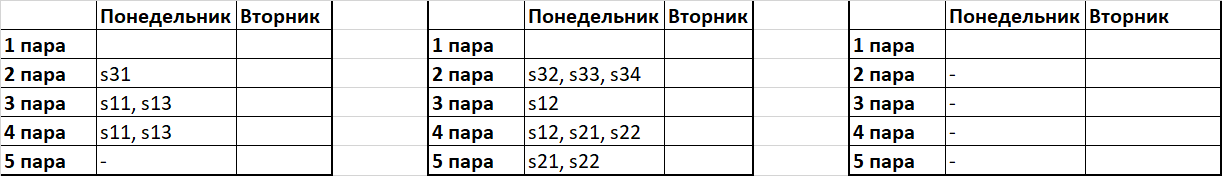

Далее берем максимальные по мощности и минимально пересекающиеся между собой группы и получаем, что их 2: (s31), (s11, s13). Как мы видим, они полностью покрывают тех студентов, которые записались на соответствующую ДП. Далее тоже самое проделываем с ДП2 и ДП3. Получаем, что для ДП2 группы: (s32, s33, s34), (s12, s21, s22) тоже покрывают всех записавшихся студентов. На ДП3, к сожалению групп не удалось набрать**

\* Первое модифицируемое место алгоритма. В качестве метрики, которую мы берем можно брать и другие варианты. Например, относительное число свободных студентов в рамках дополнительной образовательной программы и т.п. В нашем случае возьмем самое простое: абсолютное количество

\** Во-первых, мы рассмотрели только в понедельник. В рамках всей недели, возможно удалось бы найти группы для ДП3. Во-вторых, это один из минусов жадного алгоритма. Т.к. задача автоматического составления расписания является NP полной задачей, а жадный алгоритм работает относительно линейно, то, разумеется, в рамках его применения мы ограничиваем наше решение, и оно не является полным. Однако, настройка жадного алгоритма, включение туда некоторых эвристик и т.д. может позволить получать более качественные результаты: например, во время операции ранжирования при фиксировании занятых студентам по ДП можно для одинаковых значений делать выбор, основываясь на генерации псевдослучайной величины (или придумать что-нибудь поизощреннее, но это уже должно быть полноценное исследование)


## Выделение блоков алгоритма

Нашей задачей стояла разработка прототипа алгоритма, решающего поставленную задачу. Для того, чтобы в дальнейшем другие могли с относительной простотой вносить изменения в алгоритм, мы предлагаем его как совокупность некоторых простых заменяемых блоков, которые выполняют свою маленькую и "глупую" функцию, которая, по сути не имеет представления об алгоритме в целом. Таким образом, заменяя эти функции, мы уже можем настраивать алгоритм и приспосабливать его к жизни. В рамках этого раздела, выделим эти блоки.

1. Блок подготовки промежуточных представлений
2. Блок расчета значений промежуточных таблиц на основе промежуточных данных (т.е. тех таблиц, с которыми будет работать жадный алгоритм, в нашем случае там было просто количество свободных студентов).
3. Блок ранжирования (как раз тот блок, на основе которого жадный алгоритм работает)
4. Блок компоновки групп (тот блок, который отвечает за формирвание групп по отдельным ДП)


Каждый из этих блоков должен представлять собой класс, который имеет метод `process`.
Класс главного алгоритма должен содержать ссылки на интерфейсы этих блоков, а конкретные реализации блоков должны встраиваться в конструкторе класса главного алгоритма.

In [2]:
class TimetableAlg:
    def __init__(self, pre_stage: PreprocessStage,
                 mid_stage: MidProcessStage,
                 range_stage: RangeProcessStage,
                 compose_stage: ComposeProcessStage):
        self._pre_stage = pre_stage
        self._mid_stage = mid_stage
        self._range_stage = range_stage
        self._compose_stage = compose_stage
        
        
    def process(self, data):
        pre_data = self._pre_stage.process(data)
        mid_data = self._mid_stage.process(pre_data)
        
        range_data = self._range_stage.process({pre_data, mid_data})
        compose_data = self._compose_stage.process(range_data)
        return compose_data
        

NameError: name 'PreprocessStage' is not defined

### Блок подготовки промежуточных представлений
##### Вход
На вход данный блок получает списки студентов в основных группах, списки студентов по ДП, и расписание

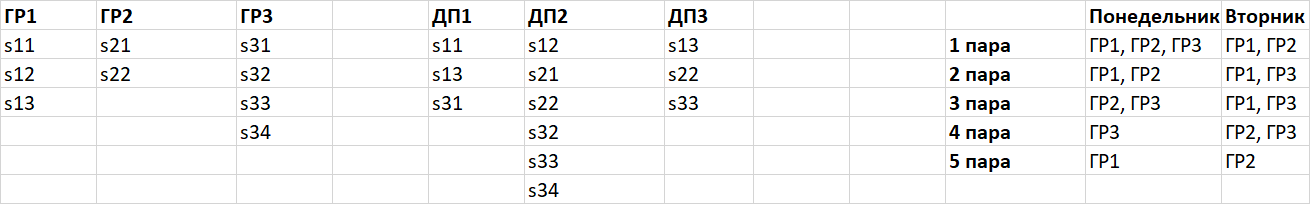

##### Выход

На выходе блок должен выдать таблицу свободных студентов.

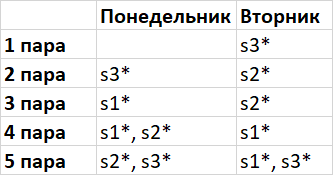

In [ ]:
!dir

In [ ]:
students_group_dict = {}
with open('classes.json') as d:
    dict_data = json.load(d)
    
students_group_dict

In [ ]:
dict_data

In [ ]:
classes_variant = {
    "1-2": 0,
    "3-4": 1,
    "5-6": 2,
    "7-8": 3,
    "9-10": 4,
    "11-12": 5,
}

weekdays_variants = {
    'ПОНЕДЕЛЬНИК': 0,
    'ВТОРНИК': 1,
    'СРЕДА': 2,
    'ЧЕТВЕРГ': 3,
    'ПЯТНИЦА': 4,
    'СУББОТА': 5
}

even_variants = {
    'НЕЧЕТНАЯ': 0,
    'ЧЕТНАЯ': 1
}

In [3]:
weekdays, evens = 6, 2
days = weekdays * evens

classes_count = 6

result_groups = np.empty(shape=(classes_count, days), dtype=list)
result_students = np.empty(shape=(classes_count, days), dtype=list)
for i, r_ in enumerate(result):
    for j, r__ in enumerate(r_):
        result_groups[i][j] = []
        result_students[i][j] = []

NameError: name 'result' is not defined

In [4]:
result_groups

array([[None, None, None, None, None, None, None, None, None, None, None,
        None],
       [None, None, None, None, None, None, None, None, None, None, None,
        None],
       [None, None, None, None, None, None, None, None, None, None, None,
        None],
       [None, None, None, None, None, None, None, None, None, None, None,
        None],
       [None, None, None, None, None, None, None, None, None, None, None,
        None],
       [None, None, None, None, None, None, None, None, None, None, None,
        None]], dtype=object)

In [10]:
dict_data_1 = dict_data.copy()

In [5]:
for group_num, group in enumerate(dict_data_1):
    g = group['group']['free_classes']
    for free_class_num, free_class in enumerate(g):
        
        # TODO: Потом дописать нормально!
        free_class['weekday'] = weekdays_variants[str(free_class['weekday']).replace(' ', '')]
        free_class['even'] = even_variants[free_class['even']]
        free_class['class'] = classes_variant[str(free_class['class']).replace(' ', '')]

NameError: name 'dict_data_1' is not defined

In [6]:
for group in dict_data_1:
    g = group['group']['free_classes']
    for free_class in g:
        row = free_class['class']
        column = (free_class['weekday'] + 1) * (free_class['even'] + 1) -1
        
        result_groups[row][column].append(group['group']['name'])

NameError: name 'dict_data_1' is not defined

In [7]:
result_groups

array([[None, None, None, None, None, None, None, None, None, None, None,
        None],
       [None, None, None, None, None, None, None, None, None, None, None,
        None],
       [None, None, None, None, None, None, None, None, None, None, None,
        None],
       [None, None, None, None, None, None, None, None, None, None, None,
        None],
       [None, None, None, None, None, None, None, None, None, None, None,
        None],
       [None, None, None, None, None, None, None, None, None, None, None,
        None]], dtype=object)

In [8]:
groups_dict = {}
with open('extra_classes_data.json') as d:
    dict_extra_data = json.load(d)


In [9]:
dict_extra_data[3]

{'class': {'name': 'ППЦП',
  'groups': [{'group': {'name': '2',
     'students': ['6538f765a04fb531ff864efa']}},
   {'group': {'name': 'КТО-2н',
     'students': ['6538f76aa04fb531ff864efc',
      '6538f8c9a04fb531ff864fb5',
      '653d2130eb88958547ae104b']}},
   {'group': {'name': 'КТО-224',
     'students': ['6538f770a04fb531ff864f00',
      '6538f7a2a04fb531ff864f16',
      '6538f829a04fb531ff864f58',
      '6538f862a04fb531ff864f79',
      '6538f880a04fb531ff864f8d',
      '6538f898a04fb531ff864f9c',
      '6538fb09a04fb531ff8650cd']}},
   {'group': {'name': 'ИтФомАИ222', 'students': ['6538f77aa04fb531ff864f05']}},
   {'group': {'name': 'КТО-324',
     'students': ['6538f77fa04fb531ff864f07',
      '6538f845a04fb531ff864f68',
      '6538f889a04fb531ff864f93',
      '6538f984a04fb531ff865013',
      '6538f9c7a04fb531ff865035',
      '6538fa02a04fb531ff865053',
      '6538fa24a04fb531ff865066',
      '6538fb14a04fb531ff8650d1',
      '6538fb6ea04fb531ff8650f9']}},
   {'group': {'nam

#### Тестовые придуманные данные

In [16]:
def to_classes(data):
    pass

In [49]:
classes = [{
    "weekday": 0,
    "class": 0,
    "groups": [
        "СП - 1П", "ЛПл -1П"
    ]}, {
    "weekday": 0,
    "class": 1,
    "groups": [
        "СП - 1П"
    ]}, {
    "weekday": 0,
    "class": 2,
    "groups": [
        "СП - 1П"
    ]}, {
    "weekday": 0,
    "class": 3,
    "groups": [
        "ЛПл -1П"
    ]}, {
    "weekday": 0,
    "class": 4,
    "groups": [
        "СП - 1П", "ЛПл -1П"
    ]}, {
    "weekday": 0,
    "class": 5,
    "groups": [
        "ЛПл -1П"
    ]}
]

In [50]:
def to_main_groups(data):
    pass

In [52]:
main_groups = [{
    "name": "СП - 1П",
    "students": [
        "6538edcfa04fb531ff864b57",
        "6238edf3a04fb531ff864b72"
    ]
},
{
    "name": "ЛПл -1П",
    "students": [
        "5538edcfa04fb531ff864b81",
        "1238edf3a04fb531ff864b02"
    ]
}]

In [56]:
def to_main_groups_prep(data):
    result = {}
    for group in data:
        group_name = group['name']
        group_students = group['students']
        result[group_name] = group_students
        
    return result

In [57]:
to_main_groups_prep(main_groups)

{'СП - 1П': ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72'],
 'ЛПл -1П': ['5538edcfa04fb531ff864b81', '1238edf3a04fb531ff864b02']}

In [41]:
main_groups_prep = {
    "СП - 1П": [
        "6538edcfa04fb531ff864b57",
        "6238edf3a04fb531ff864b72"
    ],
    "ЛПл -1П": [
        "5538edcfa04fb531ff864b81",
        "1238edf3a04fb531ff864b02"
    ]
}

In [58]:
def to_extra_classes(data):
    pass

In [42]:
extra_classes = [{
    "name": "СИИ",
    "students": [
        "6538edcfa04fb531ff864b57",
        "6238edf3a04fb531ff864b72",
        "5538edcfa04fb531ff864b81",
        "5538edcfa04fb531ff864b82",
        "5538edcfa04fb531ff864b83"
    ]
},
{
    "name": "СУБД",
    "students": [
        "6538edcfa04fb531ff864b57",
        "1238edf3a04fb531ff864b02",
        "1238edf3a04fb531ff864b05"
    ]
},
{
    "name": "ППЦП",
    "students": [
        "6538edcfa04fb531ff864b57",
        "1238edf3a04fb531ff864b50",
        "1238edf3a04fb531ff864b99",
        "1238edf3a04fb531ff864b22"
    ]
}]

In [59]:
def to_extra_classes_prep(data):
    result = {}
    for extra_class in data:
        class_name = extra_class['name']
        students = extra_class['students']
        
        result[class_name] = students
        
    return result

In [43]:
extra_classes_prep = {
    "СИИ": [
        "6538edcfa04fb531ff864b57",
        "6238edf3a04fb531ff864b72",
        "5538edcfa04fb531ff864b81",
        "5538edcfa04fb531ff864b82",
        "5538edcfa04fb531ff864b83"
    ],
    "СУБД": [
        "6538edcfa04fb531ff864b57",
        "1238edf3a04fb531ff864b02",
        "1238edf3a04fb531ff864b05"
    ],
    "ППЦП": [
        "6538edcfa04fb531ff864b57",
        "1238edf3a04fb531ff864b50",
        "1238edf3a04fb531ff864b99",
        "1238edf3a04fb531ff864b22"
    ]
}

In [10]:
weekdays, evens = 6, 2
days = weekdays * evens

classes_count = 6

result_groups = np.empty(shape=(classes_count, days), dtype=list)
result_students = np.empty(shape=(classes_count, days), dtype=list)
for i, r_ in enumerate(result_groups):
    for j, r__ in enumerate(r_):
        result_groups[i][j] = []
        result_students[i][j] = []

In [11]:
for _class in classes:
    row = _class['class']
    column = _class['weekday']
    groups = _class['groups']
    
    result_groups[row][column] = groups 

NameError: name 'classes' is not defined

In [12]:
for i, cl_i in enumerate(result_groups):
    for j, cl_j in enumerate(cl_i):
        stud_list = []
        for group in cl_j:
            students = main_groups_prep[group]
            for stud in students:
                stud_list.append(stud)
        
        result_students[i][j] = stud_list

['6538edcfa04fb531ff864b57',
 '6238edf3a04fb531ff864b72',
 '5538edcfa04fb531ff864b81',
 '1238edf3a04fb531ff864b02']

In [13]:
class PreprocessStage(ABC):
    @abstractmethod
    def _get_main_groups(self, data):
        """Метод, который необходимо переопределить для того, чтобы
        получить первичные данные о группах из тех, которые подаются блоку на вход.
        Данные должны быть преобразованы в JSON формат (словарь),
        далее эти данные будут использоваться для преобразования в более удобный вид
        в пределах этого блока для выполнения его работы.
        """
        result = []
        return result
    
    @abstractmethod
    def _parse_main_groups(self, data):
        """Метод, который должен быть переопределн для преобразования данных
        о группах (которые были результатом работы метода _get_main_groups),
        чтобы обработать"""
         # TODO: Дописать преобразования данных с пред.слоя
        pass
    
    def _parse_main_groups_prep(self, data):
        result = {}
        for group in data:
            group_name = group['name']
            group_students = group['students']
            result[group_name] = group_students

        return result
    
    @abstractmethod
    def _get_classes(self, data):
        result = data['classes']
        return result
    
    @abstractmethod
    def _parse_classes(self, data):
        result = []
        # TODO: Дописать преобразования данных с пред.слоя
        return result
    
    @abstractmethod
    def _get_extra_classes(self, data):
        result = []
        return result
    
    @abstractmethod
    def _parse_extra_classes(self, data):
         # TODO: Дописать преобразования данных с пред.слоя
        pass
    
    def _parse_extra_classes_prep(self, data):
        result = {}
        for extra_class in data:
            class_name = extra_class['name']
            students = extra_class['students']

            result[class_name] = students

        return result
    
    def find_student_extra_classes(self, extra_classes, student):
        result = []
        for extra_class in extra_classes:
            students = extra_classes[extra_class]
            for stud in students:
                if stud == student:
                    result.append(extra_class)
                
        return result
            
    
    def _get_result_students(self, main_groups, classes, extra_classes):  
        for _class in classes:
            row = _class['class']
            column = _class['weekday']
            groups = _class['groups']

            self._result_groups[row][column] = groups
            

        for i, cl_i in enumerate(self._result_groups):
            for j, cl_j in enumerate(cl_i):
                stud_list = []
                for group in cl_j:
                    students = main_groups[group]
                    for stud in students:
                        stud_extra_classes = self.find_student_extra_classes(extra_classes, stud)
                        stud_list.append({"student": stud, "group": group, "extra_classes": stud_extra_classes})

                self._result_students[i][j] = stud_list
                
        return self._result_students
    
    def process(self, data):
        init_classes = self._get_classes(data)
        init_extra_classes = self._get_extra_classes(data)
        init_main_groups = self._get_main_groups(data)
        
        classes = self._parse_classes(init_classes)
        extra_classes = self._parse_extra_classes(init_extra_classes)
        main_groups = self._parse_main_groups(init_main_groups)
        
        result_students = self._get_result_students(main_groups, classes, extra_classes)
        return result_students, extra_classes
    

In [14]:
class PreprocessStageMock1(PreprocessStage):
    """
    Класс заглушка для тестирования
    """
    def __init__(self, weekdays=6, classes_count=6):
        self._main_groups = []
        self._classes = []
        self._extra_classes = []
        
        days = weekdays
        self._result_groups = np.empty(shape=(classes_count, days), dtype=list)
        self._result_students = np.empty(shape=(classes_count, days), dtype=list)
        for i, r_ in enumerate(self._result_groups):
            for j, r__ in enumerate(r_):
                self._result_groups[i][j] = []
                self._result_students[i][j] = []
    
    
    def _get_main_groups(self, data):
        groups = []
        return groups
    
    def _parse_main_groups(self, data):
        groups = [{
            "name": "СП - 1П",
            "students": [
                "6538edcfa04fb531ff864b57",
                "6238edf3a04fb531ff864b72"
            ]
        },
        {
            "name": "ЛПл -1П",
            "students": [
                "5538edcfa04fb531ff864b81",
                "1238edf3a04fb531ff864b02"
            ]
        }]

        groups = self._parse_main_groups_prep(groups)
        return groups
    
    def _get_classes(self, data):
        result = []
        return result
    
    def _parse_classes(self, data):
        classes = [{
            "weekday": 0,
            "class": 0,
            "groups": [
                "СП - 1П", "ЛПл -1П"
            ]}, {
            "weekday": 0,
            "class": 1,
            "groups": [
                "СП - 1П"
            ]}, {
            "weekday": 0,
            "class": 2,
            "groups": [
                "СП - 1П"
            ]}, {
            "weekday": 0,
            "class": 3,
            "groups": [
                "ЛПл -1П"
            ]}, {
            "weekday": 0,
            "class": 4,
            "groups": [
                "СП - 1П", "ЛПл -1П"
            ]}, {
            "weekday": 0,
            "class": 5,
            "groups": [
                "ЛПл -1П"
            ]}
        ]
        return classes
    
    def _get_extra_classes(self, data):
        result = []
        return result
    
    def _parse_extra_classes(self, data):
        result = [{
            "name": "СИИ",
            "students": [
                "6538edcfa04fb531ff864b57",
                "6238edf3a04fb531ff864b72",
                "5538edcfa04fb531ff864b81",
                "5538edcfa04fb531ff864b82",
                "5538edcfa04fb531ff864b83"
            ]
        },
        {
            "name": "СУБД",
            "students": [
                "5538edcfa04fb531ff864b81",
                "6538edcfa04fb531ff864b57",
                "1238edf3a04fb531ff864b02",
                "1238edf3a04fb531ff864b05"
            ]
        },
        {
            "name": "ППЦП",
            "students": [
                "6538edcfa04fb531ff864b57",
                "1238edf3a04fb531ff864b50",
                "1238edf3a04fb531ff864b99",
                "1238edf3a04fb531ff864b22"
            ]
        }]
        
        result = self._parse_extra_classes_prep(result)
        return result

In [15]:
class PreprocessStageImpl1(PreprocessStage):
    def __init__(self, weekdays=6, classes_count=5):
        self._main_groups = []
        self._classes = []
        self._extra_classes = []
        
        self._result_groups = np.empty(shape=(classes_count, days), dtype=list)
        self._result_students = np.empty(shape=(classes_count, days), dtype=list)
        for i, r_ in enumerate(self._result_groups):
            for j, r__ in enumerate(r_):
                self._result_groups[i][j] = []
                self._result_students[i][j] = []
    
    
    def _get_main_groups(self, data):
        """Метод, который необходимо переопределить для того, чтобы
        получить первичные данные о группах из тех, которые подаются блоку на вход.
        Данные должны быть преобразованы в JSON формат (словарь),
        далее эти данные будут использоваться для преобразования в более удобный вид
        в пределах этого блока для выполнения его работы.
        """
        result = []
        return result
    
    def _parse_main_groups(self, data):
        """Метод, который должен быть переопределн для преобразования данных
        о группах (которые были результатом работы метода _get_main_groups),
        чтобы обработать"""
         # TODO: Дописать преобразования данных с пред.слоя
        pass
    
    def _get_classes(self, data):
        result = data['classes']
        return result
    
    def _parse_classes(self, data):
        result = []
        # TODO: Дописать преобразования данных с пред.слоя
        return result
    
    def _get_extra_classes(self, data):
        result = []
        return result
    
    def _parse_extra_classes(self, data):
         # TODO: Дописать преобразования данных с пред.слоя
        return []

In [16]:
mock = PreprocessStageMock1()

In [17]:
prep_result = mock.process([])[0]

### Блок расчета значений промежуточных таблиц

##### Вход
На вход, как правило может подаваться таблица свободных студентов (которая была составлена в предыдущем блоке). Для более замысловатых вариатов реализации можно прокинуть и другие данные (python это позволит, благодаря динамической типизации). Главное, учитывать это в реализации.

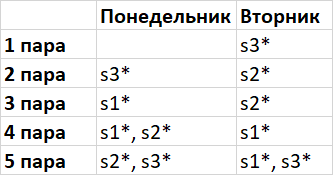

##### Выход

На выходе имеем таблицы под каждую ДП, сгенерированные в соответствие с выбранной в рамках реализации блока метрикой

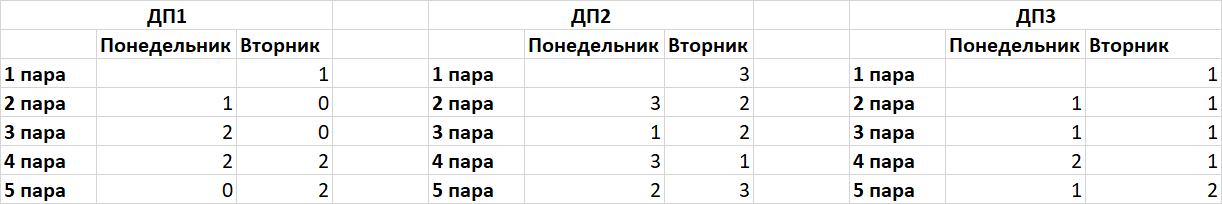



In [18]:
class MidProcessStage(ABC):
    @abstractmethod
    def get_free_students(self, data):
        pass
    
    @abstractmethod
    def form_extra_classes_timetables(self, free_students):
        pass
    
    @abstractmethod
    def update(self, extra_timetables):
        pass

    def process(self, data):
        free_students = self.get_free_students(data)
        
        result = self.form_extra_classes_timetables(free_students)
        return result

In [19]:
class MidProcessStageImpl1(MidProcessStage):
    def __init__(self, weekdays_count=6, classes_count=6):
        self._weekdays_count = weekdays_count
        self._classes_count = classes_count
        
    
    def get_free_students(self, data):
        students = data["free_students"]
        return students
    
    def _create_extra_timetable(self):
        rows = self._classes_count
        columns = self._weekdays_count
        result = np.empty(shape=(rows, columns), dtype=object)
        for i, r_ in enumerate(result):
            for j, r__ in enumerate(r_):
                result[i][j] = {
                    "value": 0,
                    "students": set()
                }
                
        return result
    
    def form_extra_classes_timetables(self, free_students):
        extra_results =  {}
        
        for class_num, class_data in enumerate(free_students):
            for weekday_num, class_cell in enumerate(class_data):
                for stud in class_cell:
                    student = stud["student"]
                    stud_extra_classes = stud["extra_classes"]
                    
                    for extra_class in stud_extra_classes:
                        
                        if extra_class not in extra_results:
                            extra_timetable_data = self._create_extra_timetable()
                            extra_results[extra_class] = extra_timetable_data
                        else:
                            extra_results[extra_class][class_num][weekday_num]["value"] += 1
                            extra_results[extra_class][class_num][weekday_num]["students"].add(student)

        return extra_results
    
    def update(self, extra_timetables):
        for extra_timetable in extra_timetables:
            current_timetable = extra_timetables[extra_timetable]
            
            for i, current_row in enumerate(current_timetable):
                for j, current_cell in enumerate(current_row):
                    students = current_cell["students"]
                    current_value = len(students)
                    extra_timetables[extra_timetable][i][j]["value"] = current_value
#                     if i == 0 and j == 0:
#                         print(current_cell)

        return extra_timetables

In [20]:
data_for_second_stage = {"free_students": prep_result}

In [21]:
mid_process_stage = MidProcessStageImpl1()

In [22]:
r = mid_process_stage.process(data_for_second_stage)

In [152]:
r["СИИ"][0][0]["students"].remove("5538edcfa04fb531ff864b81")

In [153]:
r

{'СИИ': array([[{'value': 2, 'students': {'6238edf3a04fb531ff864b72'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}],
        [{'value': 2, 'students': {'6238edf3a04fb531ff864b72', '6538edcfa04fb531ff864b57'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}],
        [{'value': 2, 'students': {'6238edf3a04fb531ff864b72', '6538edcfa04fb531ff864b57'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}],
        [{'value': 1, 'students': {'5538edcfa04fb531ff864b81'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, '

In [154]:
r = mid_process_stage.update(r)

In [88]:
r

{'СИИ': array([[{'value': 1, 'students': {'6238edf3a04fb531ff864b72'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}],
        [{'value': 2, 'students': {'6238edf3a04fb531ff864b72', '6538edcfa04fb531ff864b57'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}],
        [{'value': 2, 'students': {'6238edf3a04fb531ff864b72', '6538edcfa04fb531ff864b57'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}],
        [{'value': 1, 'students': {'5538edcfa04fb531ff864b81'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, '

In [27]:
prep_result

array([[list([{'student': '6538edcfa04fb531ff864b57', 'group': 'СП - 1П', 'extra_classes': ['СИИ', 'СУБД', 'ППЦП']}, {'student': '6238edf3a04fb531ff864b72', 'group': 'СП - 1П', 'extra_classes': ['СИИ']}, {'student': '5538edcfa04fb531ff864b81', 'group': 'ЛПл -1П', 'extra_classes': ['СИИ']}, {'student': '1238edf3a04fb531ff864b02', 'group': 'ЛПл -1П', 'extra_classes': ['СУБД']}]),
        list([]), list([]), list([]), list([]), list([])],
       [list([{'student': '6538edcfa04fb531ff864b57', 'group': 'СП - 1П', 'extra_classes': ['СИИ', 'СУБД', 'ППЦП']}, {'student': '6238edf3a04fb531ff864b72', 'group': 'СП - 1П', 'extra_classes': ['СИИ']}]),
        list([]), list([]), list([]), list([]), list([])],
       [list([{'student': '6538edcfa04fb531ff864b57', 'group': 'СП - 1П', 'extra_classes': ['СИИ', 'СУБД', 'ППЦП']}, {'student': '6238edf3a04fb531ff864b72', 'group': 'СП - 1П', 'extra_classes': ['СИИ']}]),
        list([]), list([]), list([]), list([]), list([])],
       [list([{'student': '553

### Блок ранжирования

##### Вход

На входе подаются таблицы, которые сгенерированы предыдущим блоком.

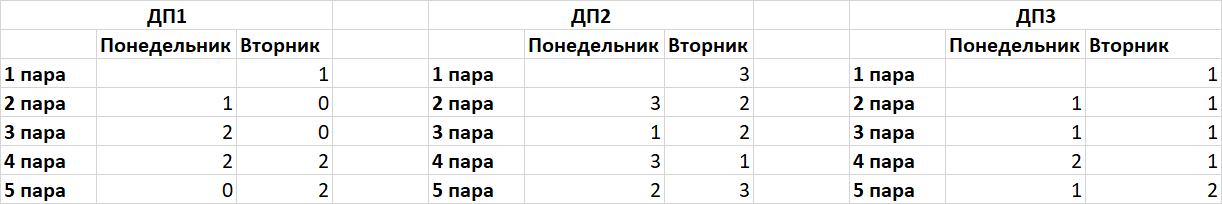

##### Выход

На выходе получаем таблицы с задействованными студентами

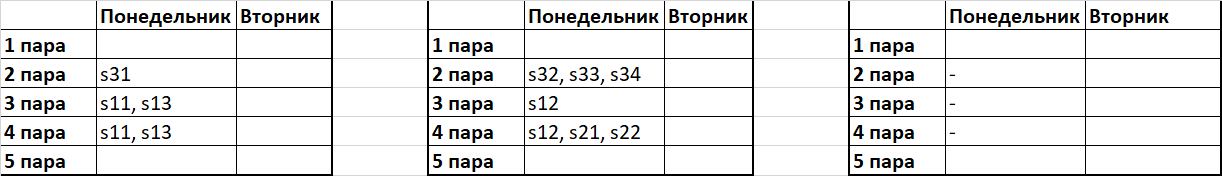


P.s. на самом деле, это не совсем правильно, для ранжирования должен быть блок, который занимается только им, а для операции составления таблиц (частью которой является ранжирование) должен быть другой блок. Но, мы для упрощения, пока сделали так

In [23]:
class RangeProcessStage(ABC):
    def __init__(self, estimate_stage: MidProcessStage, weekdays=6, classes_count=6):
        self._rng = np.random.default_rng()
        self._estimate_stage = estimate_stage
        
        self._weekdays = weekdays
        self._classes_count = classes_count
    
    @abstractmethod
    def get_extra_timetables(self, data):
        pass
    
    @abstractmethod
    def compare_grater(self, point1, point2):
        return False
    

    def process_cell(self, weekday, class_num, extra_timetables):
        row = class_num
        column = weekday
        
        current_cells = {}
        for extra_timetable in extra_timetables:
            current_timetable = extra_timetables[extra_timetable]
            current_cells[extra_timetable] = current_timetable[weekday][class_num]
            
        i = 0
        operations = len(current_cells.keys())
        
        busy_students = set()
        while i < operations:
            max_cell_num, max_extratimetable = 0, ""
            for extra_timetable in current_cells:
                current_cell = current_cells[extra_timetable]
                current_value = current_cell["value"]
                if self.compare_grater(current_value, max_cell_num):
                    max_cell_num = current_value
                    max_extratimetable = extra_timetable
                    
            if max_cell_num == 0:
                for extra_timetable in current_cells:
                    max_extratimetable = extra_timetable
                    break
                
            
            max_extratimetable_data = extra_timetables[max_extratimetable]
            
            
            cell_data = max_extratimetable_data[row][column]
            
            current_busy_students = cell_data["students"]
            for current_busy_student in current_busy_students:
                busy_students.add(current_busy_student)
                
            for extra_timetable in extra_timetables:
                if extra_timetable != max_extratimetable:
                    current_timetable = extra_timetables[extra_timetable]
                    
                    current_students = current_timetable[row][column]["students"]
                    
                    for busy_student in busy_students:
                        if busy_student in current_students:
                            current_students.remove(busy_student)            
            
            extra_timetables = self._estimate_stage.update(extra_timetables)
            i += 1
            
        return extra_timetables
    

    def process(self, data):
        extra_timetables = self.get_extra_timetables(data)
        
        rows = self._classes_count
        columns = self._weekdays
        
        for i in range(rows):
            for j in range(columns):
                extra_timetables = self.process_cell(i, j, extra_timetables)
                
        return extra_timetables

In [24]:
class RangeProcessStageWithRandImpl(RangeProcessStage):
    def __init__(self, estimate_stage: MidProcessStage, weekdays=6, classes_count=6):
        super().__init__(estimate_stage, weekdays, classes_count)
    
    def get_extra_timetables(self, data):
        return data
    
    def compare_grater(self, point1, point2):
        if point1 > point2:
            return True
        
        if point1 == point2:
            r = self._rng.random() 
            if r > 0.5:
                return True
            else:
                return False
        
        return False

In [25]:
range_process_stage = RangeProcessStageWithRandImpl(mid_process_stage)

In [26]:
r = mid_process_stage.process(data_for_second_stage)

In [238]:
r

{'СИИ': array([[{'value': 2, 'students': {'5538edcfa04fb531ff864b81', '6238edf3a04fb531ff864b72'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}],
        [{'value': 2, 'students': {'6238edf3a04fb531ff864b72', '6538edcfa04fb531ff864b57'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}],
        [{'value': 2, 'students': {'6238edf3a04fb531ff864b72', '6538edcfa04fb531ff864b57'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}],
        [{'value': 1, 'students': {'5538edcfa04fb531ff864b81'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set

In [239]:
timetables = range_process_stage.process(r)

In [240]:
r

{'СИИ': array([[{'value': 1, 'students': {'6238edf3a04fb531ff864b72'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}],
        [{'value': 2, 'students': {'6238edf3a04fb531ff864b72', '6538edcfa04fb531ff864b57'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}],
        [{'value': 2, 'students': {'6238edf3a04fb531ff864b72', '6538edcfa04fb531ff864b57'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, 'students': set()}],
        [{'value': 1, 'students': {'5538edcfa04fb531ff864b81'}},
         {'value': 0, 'students': set()}, {'value': 0, 'students': set()},
         {'value': 0, '

### Блок компоновки групп

##### Вход

На входе имеем таблицы задействованных в рамках ДП студентов

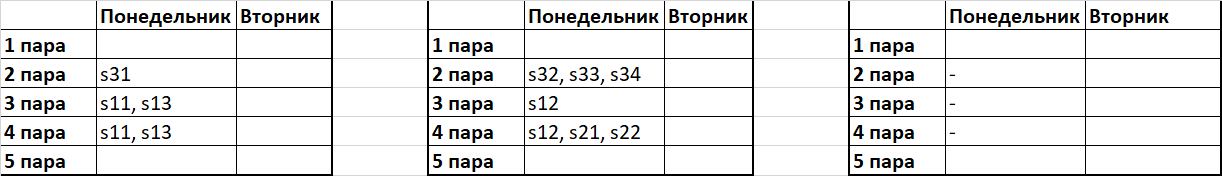

##### Выход

На выходе имеем группы по ДП

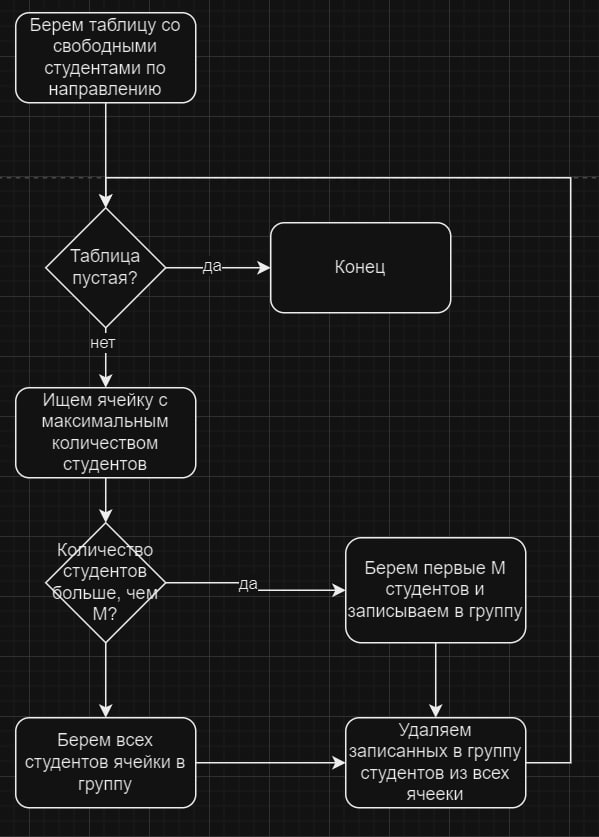

In [27]:
class ComposeProcessStage(ABC):
    @abstractmethod
    def get_timetables(self, data):
        pass
        
    @abstractmethod
    def process_timetable(self, current_timetable):
        pass
        
    def process(self, data):
        timetables = self.get_timetables(data)
        groups = {}
        result_timetables = {}
        
        for extra_class in timetables:
            current_timetable = timetables[extra_class]
#             print(current_timetable)
            current_timetable, current_groups = self.process_timetable(current_timetable)
            groups[extra_class] = current_groups
            result_timetables[extra_class] = current_timetable
            
        return result_timetables, groups

In [28]:
# TODO: ДОПИСАТЬ ФОРМИРОВАНИЕ РАСПИСАНИЯ!!!

class ComposeProcessStageImpl1(ComposeProcessStage):
    def __init__(self, max_group_capacity=12):
        self._max_group_capacity = max_group_capacity
        
    def get_timetables(self, data):
        result = data
        return result
    
    def is_timetable_empty(self, current_timetable):
        for current_row in current_timetable:
            for current_cell in current_row:
                current_cell_students = current_cell["students"]
                if (len(current_cell_students) != 0):
                    return False
        return True
        
    def process_timetable(self, current_timetable):
        groups = []
        result_timetable = np.empty_like(current_timetable.copy())
        for i, row_data in enumerate(result_timetable):
            for j, cell_data in enumerate(row_data):
                result_timetable[i][j] = []
        
        group_num = 0
        while not self.is_timetable_empty(current_timetable):
            max_cell_row, max_cell_column, max_cell_value = 0, 0, 0
            for class_num, row_data in enumerate(current_timetable):
                for weekday_num, cell_data in enumerate(row_data):
                    students = cell_data["students"]
                    students_count = len(students)

                    if students_count > max_cell_value:
                        max_cell_value = students_count
                        max_cell_row = class_num
                        max_cell_column = weekday_num

            max_cell = current_timetable[max_cell_row][max_cell_column]
            new_group_students = []
            if max_cell_value > self._max_group_capacity:
                students = list(max_cell["students"])
                new_group_students = students[:self._max_group_capacity].copy()
                    
            else:
                new_group_students = max_cell["students"].copy()
                current_timetable[max_cell_row][max_cell_column]["students"].clear()
                
                
            new_group = set(new_group_students)
            groups.append(new_group)
            group_num += 1
            for i, row_for_delete in enumerate(current_timetable):
                for j, cell_for_delete in enumerate(row_for_delete):
#                     print(i, j, current_timetable[i][j])
                    is_for_group = len(new_group_students) != 0
                    if is_for_group:
                        print("FF", new_group_students)
                    for student in new_group_students:
                        current_students_to_delete = current_timetable[i][j]["students"]
                        if len(current_students_to_delete) == 0:
                            is_for_group = False
                            break
                            
                        if student in current_students_to_delete:
                            current_timetable[i][j]["students"].remove(student)
                        else:
                            if_for_group = False
                            
                    if is_for_group == True:
                        result_timetable[i][j].append({"group_num": group_num, "students": new_group})
                        
            print(current_timetable)

        return result_timetable, groups

In [29]:
prep_result = mock.process([])[0]
data_for_second_stage = {"free_students": prep_result}
r = mid_process_stage.process(data_for_second_stage)
timetables = range_process_stage.process(r)

In [30]:
groups_clustering = ComposeProcessStageImpl1(2)

In [31]:
final = groups_clustering.process(timetables.copy())

FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72']
FF ['6538edcfa04fb531ff864b57', '6238edf

In [32]:
final[0]

{'СИИ': array([[list([{'group_num': 1, 'students': {'6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72'}}]),
         list([]), list([]), list([]), list([]), list([])],
        [list([{'group_num': 1, 'students': {'6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72'}}]),
         list([]), list([]), list([]), list([]), list([])],
        [list([{'group_num': 1, 'students': {'6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72'}}]),
         list([]), list([]), list([]), list([]), list([])],
        [list([{'group_num': 1, 'students': {'6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72'}}, {'group_num': 2, 'students': {'5538edcfa04fb531ff864b81'}}]),
         list([]), list([]), list([]), list([]), list([])],
        [list([{'group_num': 1, 'students': {'6538edcfa04fb531ff864b57', '6238edf3a04fb531ff864b72'}}, {'group_num': 2, 'students': {'5538edcfa04fb531ff864b81'}}]),
         list([]), list([]), list([]), list([]), list([])],
        [list([{'group_num': 1, 'students': {'65

In [33]:
class PostProcessData:
    def __init__(self, main_groups):
        self._main_groups = main_groups
    
    def extra_groups_process(self, groups):
        pass
    
    def get_group_name(self, group_prefix, group_num):
        return group_prefix + "--" + str(group_num)
    
    def extra_classes_process(self, timetables):
        result = []
        
        groups_dict = {}
        classes_dict = {}
        
        groups_result = []
        classes_result = []
        
        for extra_class_timetable in timetables:
            group_prefix = extra_class_timetable
            current_timetable = timetables[extra_class_timetable]
            
            
            
            for class_num, row_data in enumerate(current_timetable):
                for weekday, cell_data in enumerate(row_data):
                    current_cell_groups = []
                    for num, group in enumerate(cell_data):
                        group_num = group["group_num"]
                        group_name = self.get_group_name(group_prefix, group_num)
                        if group_name not in groups_dict:
                            students = group["students"]
                            students_data = []
                            for student in students:
                                students_data.append({
                                    "group": "",
                                    "name": student
                                })
                            data_to_add = students_data
                            groups_dict[group_name] = data_to_add

                        current_cell_groups.append(group_name)
                        
                    class_key = (class_num, weekday)
                    if class_key not in classes_dict:
                        classes_dict[class_key] = []
                
                    for g in current_cell_groups:
                        classes_dict[class_key].append(g)

        for group in groups_dict:
            groups_result.append({
                "name": group,
                "students": groups_dict[group]
            })
            
        for classes_key in classes_dict:
            classes_result.append({
                "weekday": classes_key[1],
                "class": classes_key[0],
                "groups": classes_dict[classes_key]
            })
                        
                    
                    
            
        return groups_result, classes_result
    
    def process(self, data):
        groups = data[1]
        timetables = data[0]
        
        extra_groups_result, extra_classes_result = self.extra_classes_process(timetables)
        return extra_groups_result, extra_classes_result

In [34]:
post_proc_data = PostProcessData([])

In [35]:
post_proc_data.process(final)

([{'name': 'СИИ--1',
   'students': [{'group': '', 'name': '6538edcfa04fb531ff864b57'},
    {'group': '', 'name': '6238edf3a04fb531ff864b72'}]},
  {'name': 'СИИ--2',
   'students': [{'group': '', 'name': '5538edcfa04fb531ff864b81'}]},
  {'name': 'СУБД--1',
   'students': [{'group': '', 'name': '1238edf3a04fb531ff864b02'}]}],
 [{'weekday': 0, 'class': 0, 'groups': ['СИИ--1']},
  {'weekday': 1, 'class': 0, 'groups': []},
  {'weekday': 2, 'class': 0, 'groups': []},
  {'weekday': 3, 'class': 0, 'groups': []},
  {'weekday': 4, 'class': 0, 'groups': []},
  {'weekday': 5, 'class': 0, 'groups': []},
  {'weekday': 0, 'class': 1, 'groups': ['СИИ--1']},
  {'weekday': 1, 'class': 1, 'groups': []},
  {'weekday': 2, 'class': 1, 'groups': []},
  {'weekday': 3, 'class': 1, 'groups': []},
  {'weekday': 4, 'class': 1, 'groups': []},
  {'weekday': 5, 'class': 1, 'groups': []},
  {'weekday': 0, 'class': 2, 'groups': ['СИИ--1']},
  {'weekday': 1, 'class': 2, 'groups': []},
  {'weekday': 2, 'class': 2, 'gro

In [15]:
extra_groups = [{
    "name": "СИИ-1", # название сформированной группы доп. образования
    "students": [{ # список студентов, которые участвуют в группе
        "group": "ЭП-362", # ОСНОВНАЯ группа студента
        "name": "6538ec43a04fb531ff864a26" # uid студента
    }, {
        "group": "ЭП-362",
        "name": "7832ac43a04fb545ff864a21"
    }
    ]
},
{
    "name": "СИИ-2", # название сформированной группы доп. образования
    "students": [{ # список студентов, которые участвуют в группе
        "group": "ЭП-363", # ОСНОВНАЯ группа студента
        "name": "5538ec73a04fb531ff864a43" # uid студента
    }, {
        "group": "ЭП-361",
        "name": "1132ac43a04fb545ff864a22"
    }
    ]
}]

In [14]:
extra_classes = [{
    "weekday": 0, # ПОНЕДЕЛЬНИК
    "class": 0, # 1 ПАРА
    "groups": [ # группы ДОПОЛНИТЕЛЬНОГО образования, которые участвуют в паре
        "СИИ-1", "CИИ-2"
    ]
},{
    "weekday": 0,
    "class": 0,
    "groups": [
        "СИИ-1", "CИИ-2"
    ]
}]

[{'name': 'СИИ-1',
  'students': [{'group': 'ЭП-362', 'name': '6538ec43a04fb531ff864a26'},
   {'group': 'ЭП-362', 'name': '7832ac43a04fb545ff864a21'}]}]

In [24]:
with open('alg-out-extra-groups.json', 'w') as f:
    json.dump(extra_groups, f)

In [25]:
with open('alg-out-extra-classes.json', 'w') as f:
    json.dump(extra_classes, f)